In [ ]:
import numpy as np
import pandas as pd
from icecream import ic
from matplotlib import pyplot as plt
from sklearn.model_selection import (
    cross_val_score,
    train_test_split,
)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# DATA 607 - Machine Learning

## Class 7 &mdash; 2025.05.14 &mdash; Boosting

### Random forest classifiers

In [ ]:
df = pd.read_csv("~/.kaggle/data/fashionmnist/fashion-mnist_train.csv")
y = df["label"]
X = df.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ic(len(X_train), len(X_test))

ic| len(X_train): 48000, len(X_test): 12000


In [ ]:
model = RandomForestClassifier(
    n_estimators=200, max_features="sqrt", max_samples=20_000, n_jobs=-1
)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy")
ic(scores.mean(), scores.std())

ic| scores.mean(): np.float64(0.8733333333333334)
    scores.std(): np.float64(0.005790767316263986)


In [ ]:
model = RandomForestClassifier(
    n_estimators=200, max_features="sqrt", max_samples=20_000
)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy")
ic(scores.mean(), scores.std())

ic| scores.mean(): np.float64(0.8745416666666668)
    scores.std(): np.float64(0.00195056081679091)


### Boosting

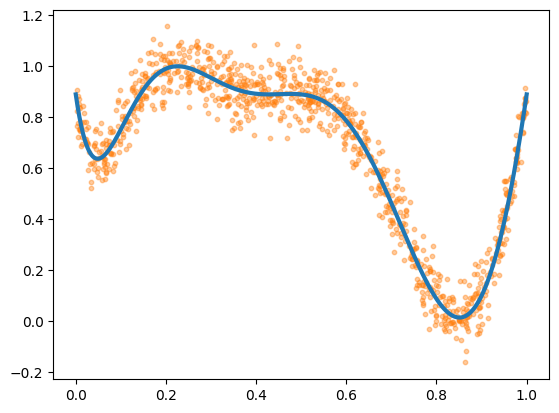

In [9]:
def f(x):
    c = np.array(
        [
            8.89790000e-01,
            -1.24853715e01,
            2.00598302e02,
            -1.20027425e03,
            3.59728524e03,
            -5.91118526e03,
            5.35786134e03,
            -2.49811475e03,
            4.66314753e02,
        ]
    )
    return sum(ci * x**i for i, ci in enumerate(c))


n = 1000
scale = 0.07
n_estimators = 10000

rng = np.random.default_rng()
x_train = rng.uniform(size=n)
e_train = rng.normal(scale=scale, size=n)
y_train = f(x_train) + e_train

x_test = np.linspace(0, 1, 1000)
X_test = x_test.reshape(-1, 1)
e_test = rng.normal(scale=scale, size=n)
y_test = f(x_test) + e_train

plt.plot(x_test, f(x_test), lw=3)
plt.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
plt.show()